# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


In [5]:
cities

['adamstown',
 'longyearbyen',
 'tiksi',
 'waitangi',
 'klamath falls',
 'polyarnyy',
 'anadyr',
 'bilibino',
 'yellowknife',
 'aasiaat',
 'la ronge',
 'leava',
 'sao vicente',
 'stanley',
 'klyuchi',
 'yuzhno-kurilsk',
 'wynyard',
 'burang',
 'saint-pierre',
 'bredasdorp',
 "kapa'a",
 "ha'il",
 'ahfir',
 'puerto ayora',
 'grytviken',
 'olonkinbyen',
 'bandar abbas',
 'miyako',
 'usinsk',
 'bethel',
 'korsakov',
 'aldinga beach',
 'ribeira grande',
 'albany',
 'puerto natales',
 'port mathurin',
 'hermanus',
 'camalu',
 'whitehorse',
 'afaahiti',
 'tranovaho',
 'general salgado',
 'papatowai',
 'kapuskasing',
 'port-aux-francais',
 'den burg',
 'hawaiian paradise park',
 'antalaha',
 'fale old settlement',
 'cockburn town',
 'invercargill',
 'taiohae',
 'faya-largeau',
 'gizo',
 'hamilton',
 'dingwall',
 'lihue',
 'tura',
 'kodiak',
 'iqaluit',
 'arno',
 'margaret river',
 'la passe',
 'huarmey',
 'lazaro cardenas',
 'thompson',
 'vila franca do campo',
 'uttar char fasson',
 'ushuaia'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
bethel_url = f"{url_test}&q=bethel"

city_weather_bethel = requests.get(bethel_url).json()

city_weather_bethel

{'coord': {'lon': -73.414, 'lat': 41.3712},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 290.47,
  'feels_like': 290.58,
  'temp_min': 289.29,
  'temp_max': 291.68,
  'pressure': 1016,
  'humidity': 89,
  'sea_level': 1016,
  'grnd_level': 996},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 80},
 'clouds': {'all': 100},
 'dt': 1723048632,
 'sys': {'type': 2,
  'id': 2093006,
  'country': 'US',
  'sunrise': 1723024508,
  'sunset': 1723075418},
 'timezone': -14400,
 'id': 5282297,
 'name': 'Bethel',
 'cod': 200}

In [9]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | klamath falls
Processing Record 6 of Set 1 | polyarnyy
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | la ronge
Processing Record 12 of Set 1 | leava
Processing Record 13 of Set 1 | sao vicente
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | klyuchi
Processing Record 16 of Set 1 | yuzhno-kurilsk
Processing Record 17 of Set 1 | wynyard
Processing Record 18 of Set 1 | burang
Processing Record 19 of Set 1 | saint-pierre
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | kapa'a
Processing Record 22 of Set 1 | ha'il
Processing Record 23 of Set 1 | ahfir

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,18.66,67,18,4.83,PN,1723050782
1,longyearbyen,78.2186,15.6401,10.91,93,100,1.54,SJ,1723050783
2,tiksi,71.6872,128.8694,6.18,97,80,0.49,RU,1723051121
3,waitangi,-43.9535,-176.5597,8.79,73,42,7.08,NZ,1723050760
4,klamath falls,42.2249,-121.7817,23.26,46,0,2.57,US,1723050917


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.66,67,18,4.83,PN,1723050782
1,longyearbyen,78.2186,15.6401,10.91,93,100,1.54,SJ,1723050783
2,tiksi,71.6872,128.8694,6.18,97,80,0.49,RU,1723051121
3,waitangi,-43.9535,-176.5597,8.79,73,42,7.08,NZ,1723050760
4,klamath falls,42.2249,-121.7817,23.26,46,0,2.57,US,1723050917


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

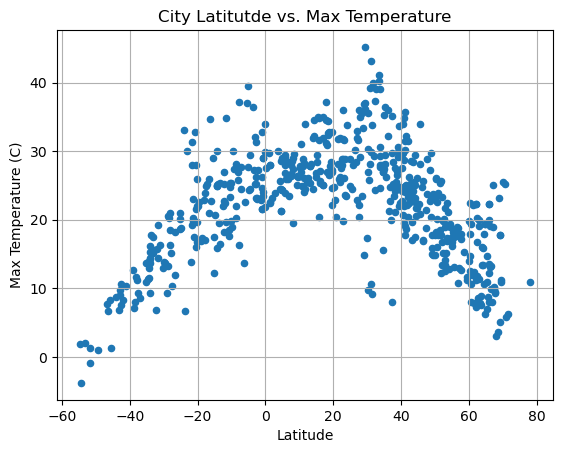

In [40]:
# Build scatter plot for latitude vs. temperature
lat_vs_temp = city_data_df[["Lat", "Max Temp"]]
lat_vs_temp.plot(kind="scatter", x = "Lat", y = "Max Temp")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

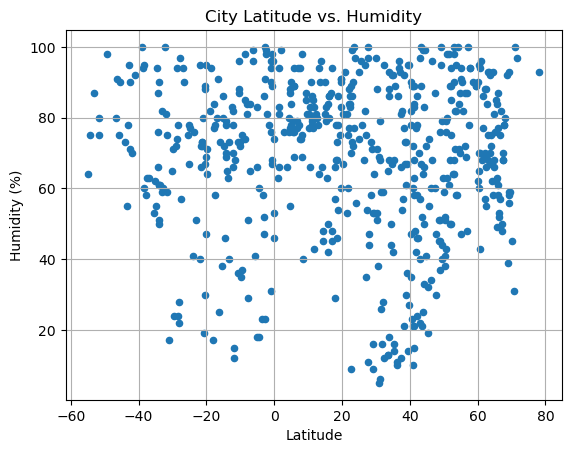

In [41]:
# Build the scatter plots for latitude vs. humidity
lat_vs_humidity = city_data_df[["Lat", "Humidity"]]
lat_vs_humidity.plot(kind="scatter", x = "Lat", y = "Humidity")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

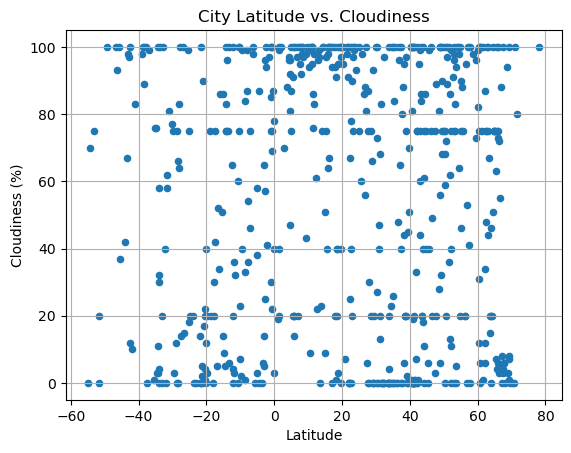

In [42]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_cloudiness = city_data_df[["Lat", "Cloudiness"]]
lat_vs_cloudiness.plot(kind="scatter", x = "Lat", y = "Cloudiness")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

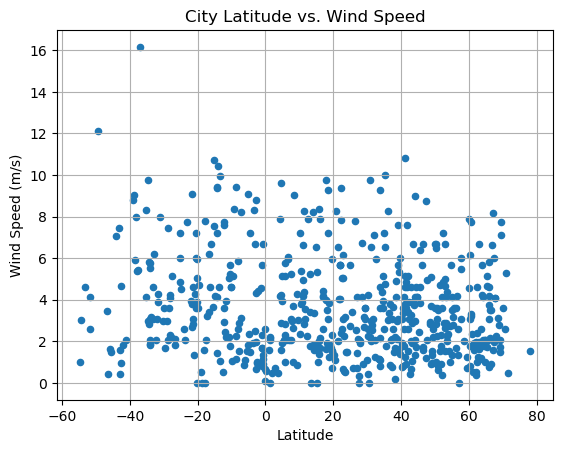

In [44]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_winds = city_data_df[["Lat", "Wind Speed"]]
lat_vs_winds.plot(kind="scatter", x = "Lat", y = "Wind Speed")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def linregress_plot(x_values, y_values, y_axis_label, plot_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_axis_label)
    plt.title(plot_title)
    print(f"The r^2-value is: {rvalue}")
    plt.show()

In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,longyearbyen,78.2186,15.6401,10.91,93,100,1.54,SJ,1723050783
2,tiksi,71.6872,128.8694,6.18,97,80,0.49,RU,1723051121
4,klamath falls,42.2249,-121.7817,23.26,46,0,2.57,US,1723050917
5,polyarnyy,69.1989,33.4478,17.70,58,8,1.50,RU,1723051124
6,anadyr,64.7500,177.4833,6.28,81,75,1.00,RU,1723051126


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.66,67,18,4.83,PN,1723050782
3,waitangi,-43.9535,-176.5597,8.79,73,42,7.08,NZ,1723050760
11,leava,-14.3000,-178.1667,25.07,69,83,9.39,WF,1723051131
12,sao vicente,-23.9631,-46.3919,33.10,41,20,2.57,BR,1723051012
16,wynyard,-41.0000,145.7167,10.40,92,83,2.06,AU,1723051137


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6360536564125155


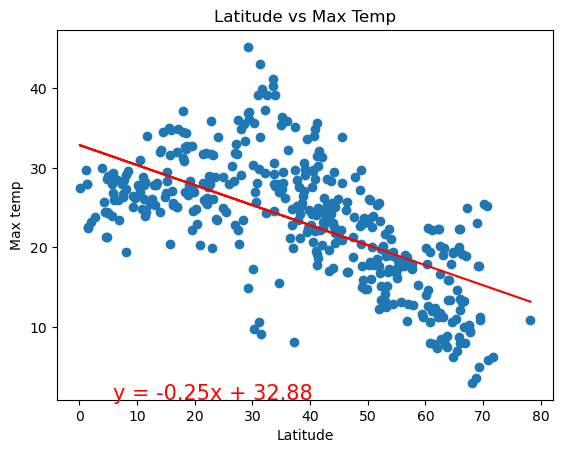

In [93]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_axis_label = "Max temp"
plot_title = "Latitude vs Max Temp"

linregress_plot(x_values, y_values, y_axis_label, plot_title)

The r^2-value is: 0.812375303297734


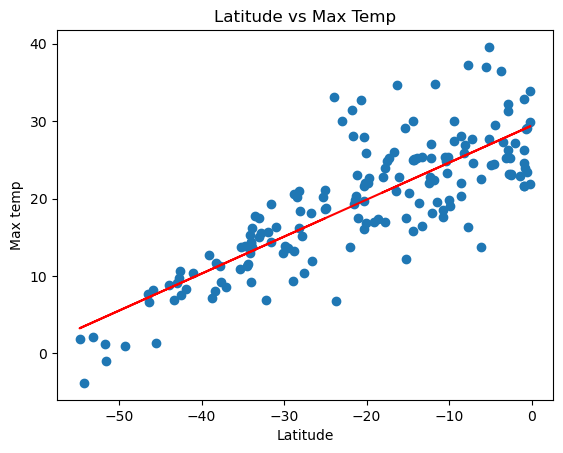

In [94]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_axis_label = "Max temp"
plot_title = "Latitude vs Max Temp"

linregress_plot(x_values, y_values, y_axis_label, plot_title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.06028463742697792


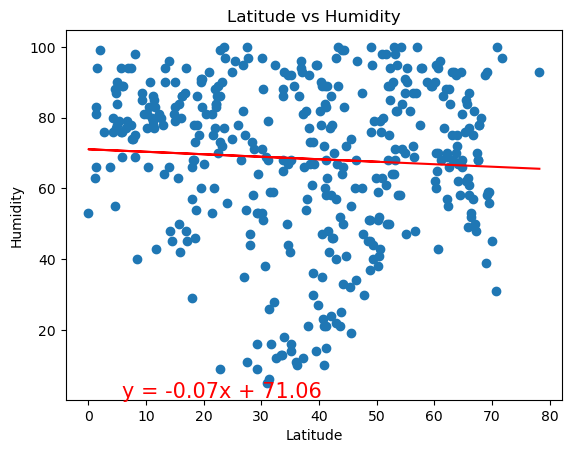

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_axis_label = "Humidity"
plot_title = "Latitude vs Humidity"

linregress_plot(x_values, y_values, y_axis_label, plot_title)

The r^2-value is: -0.08844428373081736


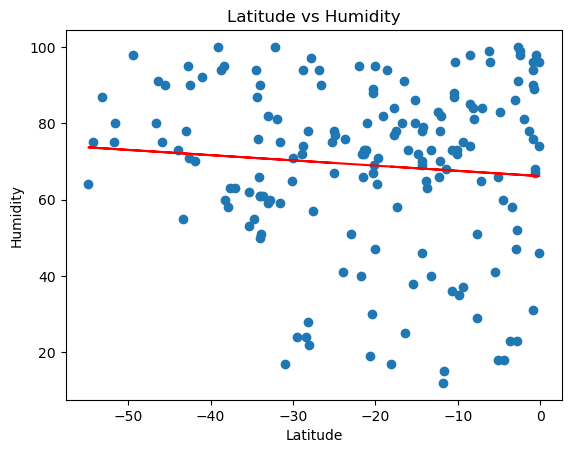

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_axis_label = "Humidity"
plot_title = "Latitude vs Humidity"

linregress_plot(x_values, y_values, y_axis_label, plot_title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.1816378331256288


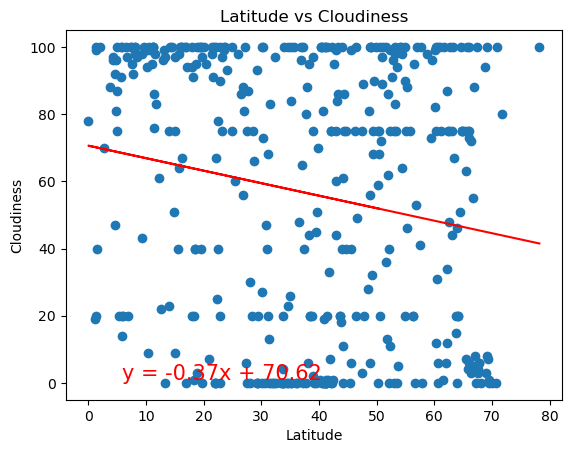

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_axis_label = "Cloudiness"
plot_title = "Latitude vs Cloudiness"

linregress_plot(x_values, y_values, y_axis_label, plot_title)

The r^2-value is: -0.019551483848531226


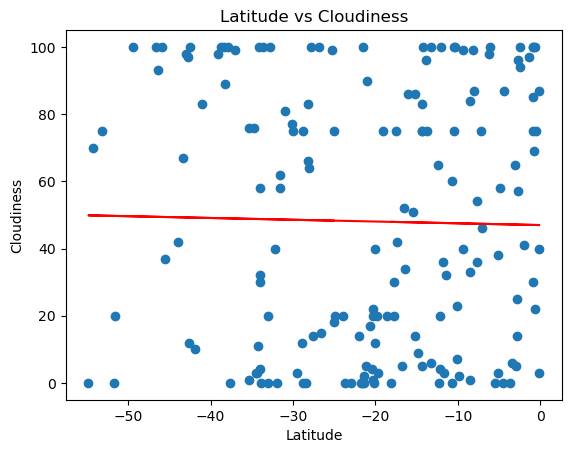

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_axis_label = "Cloudiness"
plot_title = "Latitude vs Cloudiness"

linregress_plot(x_values, y_values, y_axis_label, plot_title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.07056835927489313


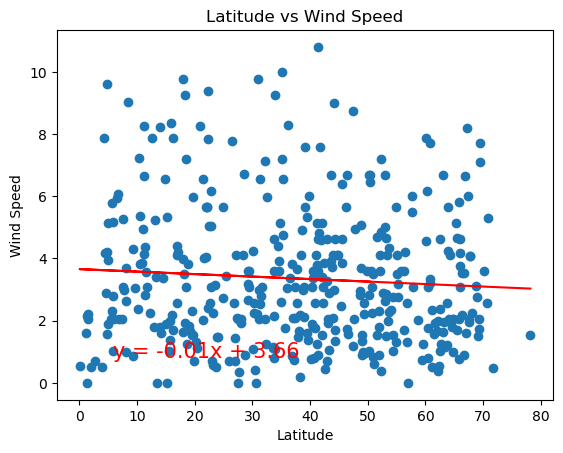

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_axis_label = "Wind Speed"
plot_title = "Latitude vs Wind Speed"

linregress_plot(x_values, y_values, y_axis_label, plot_title)

The r^2-value is: -0.09955876803017386


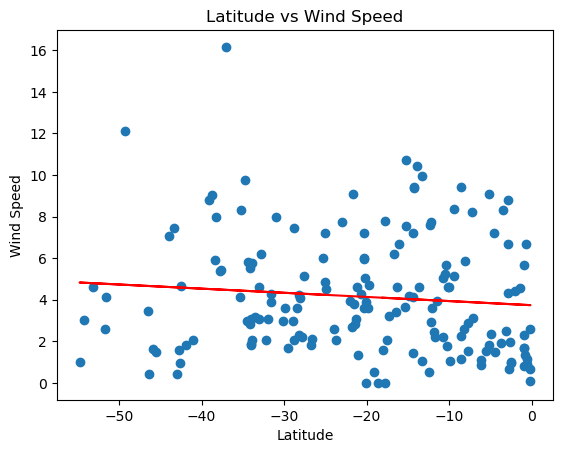

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_axis_label = "Wind Speed"
plot_title = "Latitude vs Wind Speed"

linregress_plot(x_values, y_values, y_axis_label, plot_title)

**Discussion about the linear relationship:** YOUR RESPONSE HERE